<a href="https://colab.research.google.com/github/ggarcia949/504_final-/blob/main/504_final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

504 Final project 

project description 

Packages
  Package Requirements


In [15]:
# All you may need as the IMPORTS :)
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler

EDTA

Data Importing and Pre-processing
  Data Importing and Pre-processing
Dataset Description

In [2]:
#importing the data 
df1= pd.read_csv('/content/get_it_done_311_requests_dictionary_datasd.csv')
df2= pd.read_csv('/content/pothole_requests_datasd_v1.csv')

In [4]:
#seeing the data 
df1.describe()

,field,description,possible_values
count,12,12,3
unique,12,12,3
top,service_request_id,A unique identifier for each request that also...,See list of services dataset
freq,1,1,1


In [5]:
df2.describe()

,service_request_id,service_request_parent_id,sap_notification_number,case_age_days,lat,lng,zipcode,council_district,comm_plan_code
count,8.479100e+04,2.871100e+04,5.315400e+04,83463.000000,84755.000000,84755.000000,59368.000000,84543.000000,84533.000000
mean,1.684091e+06,1.486583e+06,7.549938e+10,26.954687,32.795878,-117.099512,92111.570594,4.702956,28.925437
std,1.329102e+06,1.342107e+06,5.160382e+10,55.207168,0.627322,2.348127,23.148242,2.484889,21.788180
min,8.050800e+04,5.235200e+04,4.030000e+10,-245.000000,-43.578128,-123.068018,91911.000000,1.000000,1.000000
25%,1.803825e+05,1.479480e+05,4.030012e+10,4.000000,32.746661,-117.196366,92105.000000,2.000000,12.000000
50%,2.495834e+06,3.667320e+05,4.030029e+10,11.000000,32.790733,-117.145091,92114.000000,5.000000,27.000000
75%,2.861530e+06,2.822132e+06,1.500008e+11,27.000000,32.840988,-117.095187,92123.000000,7.000000,42.000000
max,3.437976e+06,3.437089e+06,5.000001e+11,1426.000000,52.027394,172.709463,92182.000000,9.000000,99.000000


In [10]:
df2.isna().sum()

service_request_id               0
service_request_parent_id    56080
sap_notification_number      31637
date_requested                   0
case_age_days                 1328
case_record_type                 0
service_name                     0
service_name_detail              6
date_closed                   2610
status                           0
lat                             36
lng                             36
street_address                  98
zipcode                      25423
council_district               248
comm_plan_code                 258
comm_plan_name                 258
park_name                    83826
case_origin                      0
referred                     82297
public_description            7892
iamfloc                      31403
floc                          1231
public_url                       0
dtype: int64

In [11]:
df1.isna().sum()

field              0
description        0
possible_values    9
dtype: int64

In [13]:
corr=df2.corr()

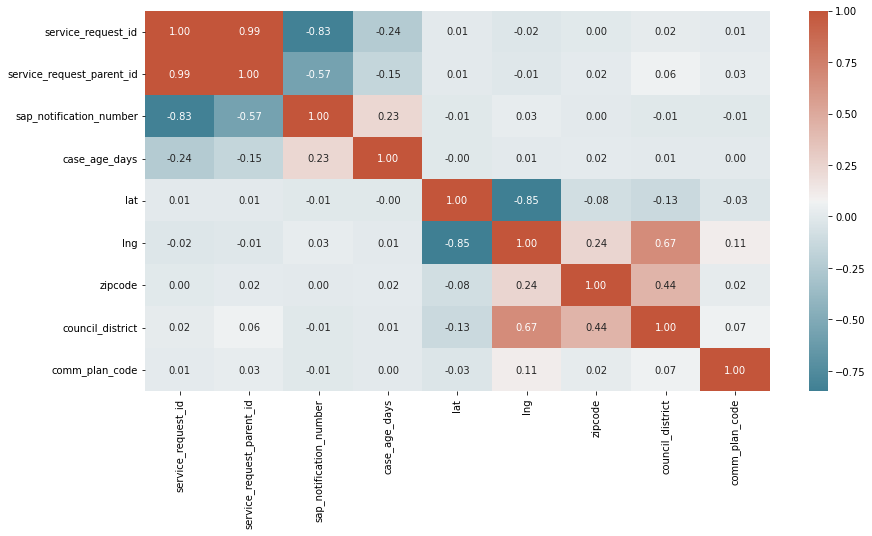

In [14]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize = (14,7))
sns.heatmap(corr, 
            cmap = cmap,
            annot = True , 
            fmt = '.2f')

In [ ]:
#PCA before we imputate the missing number?
features = []
# Separating out the features
x = df2.loc[:, features].values
# Separating out the target
y = df2.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

Data Analysis and Visualization

# modeling